### Data Cleaning

In [1]:
#General
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#import combat
#from combat import combat
#import patsy

#Normalization
from sklearn.preprocessing import StandardScaler

#Outlier removal
import scipy
from scipy import stats
from scipy.stats import zscore

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)

In [3]:
#Creating a dataframe from txt file
# Separo 

df = pd.read_csv('matrix_standard_a3zyc4.txt', delimiter = "\t", header = 0)

df = df.drop(df.columns[[6, 7, 8, 9, 10, 11, 18, 19]], axis=1)

pd.set_option('display.max_rows', 500)
df

,Class,Lipid,Occurence,m/z,RTmin,RTmax,07Scram,08Scram,09Scram,10siCreb3L1,11siCreb3L1,12siCreb3L1
0,GL02_DAG,2010003_34:0,NH4 1,614.57178,0.69,0.73,0.000000e+00,5.876273e+06,0.000000,7.570892e+06,0.000000e+00,5.122567e+05
1,GL02_DAG,2010004_34:1,NH4 1,612.55615,0.72,0.73,4.532914e+06,7.177505e+06,0.000000,7.263642e+06,6.298830e+06,4.861257e+06
2,GL02_DAG,2010008_38:0,NH4 1,670.63440,0.71,0.73,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,GL02_DAG,2010010_32:1,NH4 1,584.52484,0.72,0.73,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.881084e+06
4,GL02_DAG,2010011_32:2,NH4 1,582.50922,0.72,0.73,1.631554e+06,0.000000e+00,0.000000,2.247223e+06,0.000000e+00,2.397069e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2349,SP05_HexCer,501AB15_36:0,H 1,892.67194,2.83,2.97,1.293674e+06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,9.575011e+05
2350,SP05_HexCer,501AB15_36:0,H 2,892.67194,4.49,4.57,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2351,SP05_HexCer,502AU05_42:1,NH4 1,1461.94031,4.58,4.58,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2352,SP05_HexCer,503AN01_34:1,NH4 1,1285.81030,4.42,4.48,4.046390e+05,4.340519e+05,339933.195312,4.275727e+05,3.612745e+05,4.285995e+05


In [4]:
#Selection of important characters on columns Class and Lipid

Class2 = []
for row in df['Class']:
    row = row.split('_')
    if row[1] == 'PxCer':
        Class2.append('SM')
    else:
        Class2.append(row[1])
    
df.insert(0, 'Class2', Class2)

Lipid2 = []
for row in df['Lipid']:
    row = row.split('_')
    if row[0] == '1deoxyCer':
        Lipid2.append(f'1deoxyCer({row[1]})')
    elif row[0].startswith('EX'):
        Lipid2.append(f'EX({row[1]})')
    else:
        Lipid2.append(f'({row[1]})')
    
df.insert(2, 'Lipid2', Lipid2)

<AxesSubplot:>

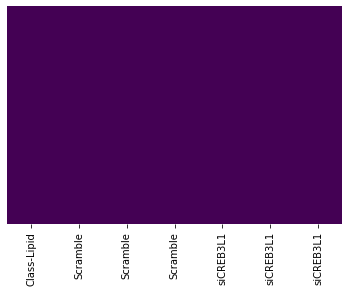

In [5]:
#Elimination of unnecesary columns
df['Class-Lipid'] = df['Class2'] + df['Lipid2']
first_col = df.pop('Class-Lipid')
df.insert(0, 'Class-Lipid', first_col)
df = df.drop(['Occurence','m/z','RTmin','RTmax', 'Class', 'Lipid', 'Class2', 'Lipid2'], axis = 1)
#Rename Columns
df = df.rename(columns = {'07Scram': 'Scramble', '08Scram': 'Scramble', '09Scram': 'Scramble',
                          '10siCreb3L1': 'siCREB3L1', '11siCreb3L1': 'siCREB3L1', '12siCreb3L1': 'siCREB3L1'}
               , inplace = False)

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

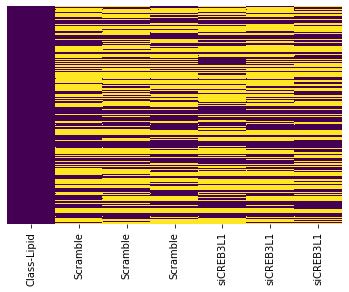

In [6]:
#transform 0 to nans
df.replace(0, np.nan, inplace=True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [7]:
df

,Class-Lipid,Scramble,Scramble,Scramble,siCREB3L1,siCREB3L1,siCREB3L1
0,DAG(34:0),NaN,5.876273e+06,NaN,7.570892e+06,NaN,5.122567e+05
1,DAG(34:1),4.532914e+06,7.177505e+06,NaN,7.263642e+06,6.298830e+06,4.861257e+06
2,DAG(38:0),NaN,NaN,NaN,NaN,NaN,NaN
3,DAG(32:1),NaN,NaN,NaN,NaN,NaN,2.881084e+06
4,DAG(32:2),1.631554e+06,NaN,NaN,2.247223e+06,NaN,2.397069e+06
...,...,...,...,...,...,...,...
2349,HexCer(36:0),1.293674e+06,NaN,NaN,NaN,NaN,9.575011e+05
2350,HexCer(36:0),NaN,NaN,NaN,NaN,NaN,NaN
2351,HexCer(42:1),NaN,NaN,NaN,NaN,NaN,NaN
2352,HexCer(34:1),4.046390e+05,4.340519e+05,339933.195312,4.275727e+05,3.612745e+05,4.285995e+05


<AxesSubplot:>

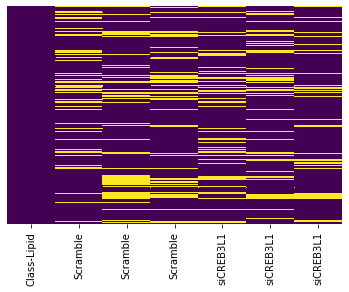

In [8]:
# dropping the NaNs, treshols 3 means that those rows with at least 3 non-NaN values are kept
df = df.dropna(axis=0, how='any', thresh=3, inplace=False)
df = df.reset_index(drop = True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [9]:
#transpose of the dataframe
df_t = df.T
df_t = df_t.reset_index(drop = False)
#df_t = df_t.convert_dtypes()
df_t

,index,0,1,2,3,4,5,6,7,8,...,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506
0,Class-Lipid,DAG(34:0),DAG(34:1),DAG(32:2),DAG(33:0),DAG(33:2),DAG(34:2),DAG(35:0),DAG(35:1),DAG(35:2),...,HexCer(36:1),HexCer(36:2),HexCer(36:2),HexCer(38:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(37:2),HexCer(36:0),HexCer(34:1)
1,Scramble,NaN,4532914.445312,1631553.566406,NaN,2276403.6875,2328098.53125,NaN,NaN,1661810.90625,...,313113.994141,1095390.740234,4104345.042969,1112471.069824,941591.785156,15002421.75,10216032.015625,817633.804688,1293673.609375,404638.96875
2,Scramble,5876273.359375,7177505.0625,NaN,NaN,2212196.703125,3235176.125,NaN,2548320.960938,2232062.390625,...,318730.027344,NaN,4574357.078125,NaN,1090117.851562,16372927.734375,11887475.84375,NaN,NaN,434051.920898
3,Scramble,NaN,NaN,NaN,435425.119141,NaN,3533363.90625,NaN,NaN,1759165.125,...,290393.521484,NaN,4180615.570312,NaN,1078248.546875,14911050.265625,10298135.03125,NaN,NaN,339933.195312
4,siCREB3L1,7570891.8125,7263641.875,2247223.15625,NaN,2002217.84375,3500061.46875,598608.855469,3172395.445312,2187210.15625,...,420262.035156,NaN,4164344.617188,NaN,968627.046875,15864430.328125,10195604.265625,NaN,NaN,427572.650391
5,siCREB3L1,NaN,6298830.359375,NaN,503323.371094,NaN,2845860.65625,294849.275391,2689120.6875,2188144.625,...,551101.511719,441019.728516,6148073.960938,479826.70752,1382923.628906,20228781.234375,14803172.359375,NaN,NaN,361274.495117
6,siCREB3L1,512256.710938,4861257.046875,2397069.34375,NaN,2923043.40625,2796395.40625,432713.693359,2441693.328125,1997030.296875,...,417016.699219,929431.023438,4692923.617188,700729.308594,1156830.486328,17728365.046875,11105549.328125,524597.257812,957501.101562,428599.457031


<AxesSubplot:>

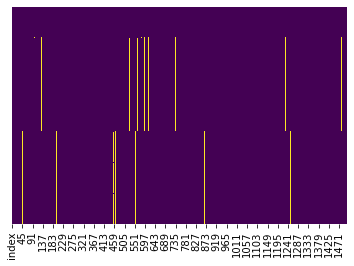

In [10]:
#group by condition and fill nan with the mean of the condition
df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
df_t = df_t.reset_index(drop = True)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

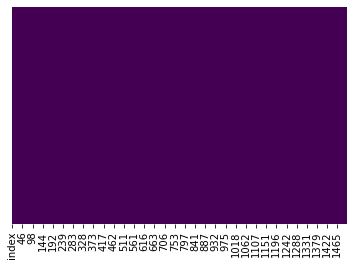

In [11]:
#droppping the rest of the Nans
df_t = df_t.dropna(axis=1, inplace=False)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [12]:
df_t = df_t.rename(columns=df_t.iloc[0])
df_t.drop(0,0,inplace=True)
df_t

,Class-Lipid,DAG(34:0),DAG(34:1),DAG(32:2),DAG(33:0),DAG(33:2),DAG(34:2),DAG(35:1),DAG(35:2),DAG(36:1),...,HexCer(36:1),HexCer(36:2),HexCer(36:2),HexCer(38:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(37:2),HexCer(36:0),HexCer(34:1)
1,Scramble,5876273.359375,4532914.445312,1631553.566406,435425.119141,2276403.6875,2328098.53125,2548320.960938,1661810.90625,3178970.183594,...,313113.994141,1095390.740234,4104345.042969,1112471.069824,941591.785156,15002421.75,10216032.015625,817633.804688,1293673.609375,404638.96875
2,Scramble,5876273.359375,7177505.0625,1631553.566406,435425.119141,2212196.703125,3235176.125,2548320.960938,2232062.390625,5048634.0,...,318730.027344,1095390.740234,4574357.078125,1112471.069824,1090117.851562,16372927.734375,11887475.84375,817633.804688,1293673.609375,434051.920898
3,Scramble,5876273.359375,5855209.753906,1631553.566406,435425.119141,2244300.195312,3533363.90625,2548320.960938,1759165.125,4113802.091797,...,290393.521484,1095390.740234,4180615.570312,1112471.069824,1078248.546875,14911050.265625,10298135.03125,817633.804688,1293673.609375,339933.195312
4,siCREB3L1,7570891.8125,7263641.875,2247223.15625,503323.371094,2002217.84375,3500061.46875,3172395.445312,2187210.15625,4806820.125,...,420262.035156,685225.375977,4164344.617188,590278.008057,968627.046875,15864430.328125,10195604.265625,524597.257812,957501.101562,427572.650391
5,siCREB3L1,4041574.261719,6298830.359375,2322146.25,503323.371094,2462630.625,2845860.65625,2689120.6875,2188144.625,3947100.648438,...,551101.511719,441019.728516,6148073.960938,479826.70752,1382923.628906,20228781.234375,14803172.359375,524597.257812,957501.101562,361274.495117
6,siCREB3L1,512256.710938,4861257.046875,2397069.34375,503323.371094,2923043.40625,2796395.40625,2441693.328125,1997030.296875,3696707.761719,...,417016.699219,929431.023438,4692923.617188,700729.308594,1156830.486328,17728365.046875,11105549.328125,524597.257812,957501.101562,428599.457031


In [ ]:
df_t.iloc[:,1:] = df_t.iloc[:,1:].div(df_t.iloc[:,1:]['PCEX(34:1)'], axis=0)
df_t = df_t.drop(['PCEX(34:1)'], axis = 1)

## Volcano Plot

In [25]:
#creating new df with mean, std and n.obs
df4 = df_t.set_index(['Class-Lipid']).T.astype('float64').copy()
df_pvalue = pd.DataFrame()
df_pvalue['siCREB3L1_mean'] = df4.groupby(axis = 1, level = 0).mean()['siCREB3L1']
df_pvalue['siCREB3L1_std'] = df4.groupby(axis = 1, level = 0).std()['siCREB3L1']
df_pvalue['siCREB3L1_n'] = 3
df_pvalue['Scramble_mean'] = df4.groupby(axis = 1, level = 0).mean()['Scramble']
df_pvalue['Scramble_std'] = df4.groupby(axis = 1, level = 0).std()['Scramble']
df_pvalue['Scramble_n'] = 3

#pvalue function
df_pvalue['pvalue'] = df_pvalue.apply(lambda x: stats.ttest_ind_from_stats(x['siCREB3L1_mean'],x['siCREB3L1_std'],x['siCREB3L1_n'], 
                                                     x['Scramble_mean'],x['Scramble_std'],x['Scramble_n'])[1],axis=1)
# convert pvalue to minus log10
df_pvalue['pvalue'] = df_pvalue['pvalue'].transform(lambda x: -np.log10(x))
df_pvalue = df_pvalue.rename(columns = {'pvalue': 'minuslog10_pvalue'}, inplace = False)

#fold change
df_pvalue['fold_change'] = df_pvalue['siCREB3L1_mean'].div(df_pvalue['Scramble_mean'], axis = 0)

# convert fold change to log2
df_pvalue['log2_fold_change'] = df_pvalue['fold_change'].transform(lambda x: np.log2(x))

# save to csv
df_pvalue.to_csv('creb3l1_silencing_fc_pvalue.csv')

In [26]:
df_pvalue

,siCREB3L1_mean,siCREB3L1_std,siCREB3L1_n,Scramble_mean,Scramble_std,Scramble_n,minuslog10_pvalue,fold_change,log2_fold_change
DAG(34:0),0.000193,0.000177,3,0.000331,0.000028,3,0.594731,0.584699,-0.774233
DAG(34:1),0.000294,0.000062,3,0.000326,0.000051,3,0.279843,0.901061,-0.150303
DAG(32:2),0.000111,0.000009,3,0.000092,0.000008,3,1.307632,1.210861,0.276033
DAG(33:0),0.000024,0.000002,3,0.000025,0.000002,3,0.091752,0.983396,-0.024156
DAG(33:2),0.000118,0.000025,3,0.000126,0.000012,3,0.205407,0.932990,-0.100066
...,...,...,...,...,...,...,...,...,...
HexCer(32:2),0.000854,0.000054,3,0.000866,0.000029,3,0.118615,0.986675,-0.019353
HexCer(34:2),0.000571,0.000070,3,0.000605,0.000002,3,0.353085,0.943046,-0.084599
HexCer(37:2),0.000025,0.000002,3,0.000046,0.000004,3,2.969128,0.545836,-0.873462
HexCer(36:0),0.000046,0.000003,3,0.000073,0.000006,3,2.582808,0.629665,-0.667345


In [29]:
# Creation of the volcano class to generate the plot.... this could be in a separate file

class Volcano(object):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.style.use('ggplot')
    
    def __init__(self, ratio, p_val, label=None, s_curve_x_axis_overplot=0.5, s_curve_y_axis_overplot=0.5):
        """
        careful use ratio not difference as in Perseus 
        ratio of 0.5 instead of difference -2
        :param ratio: Pandas.Series or Numpy.Array or List of log2(ratios)
        :param p_val: Pandas.Series or Numpy.Array or List of -log10(p-values) 
        :param label: Pandas.Series or Numpy.Array or ListOfString
        """
        assert len(ratio) == len(p_val)
        self.df = pd.DataFrame({"ratio": ratio, "p_val": p_val})
        if label is not None:
            self.df["label"] = label
        self.s_curve_y_axis_overplot = s_curve_y_axis_overplot
        self.p_val_cutoff = self.get_p_val_cutoff()
        self.ratio_cutoff = self.get_ratio_cutoff()
        self.df["s_val"] = self.df.apply(self.calc_s_from_row, axis=1)
        self.ratio_for_s = pd.Series(np.linspace(self.df["ratio"].min() - s_curve_x_axis_overplot, self.df["ratio"].max() + s_curve_x_axis_overplot, num=1000))
        self.p_for_s_larger_1 = self.ratio_for_s.apply(self.calc_p_for_s_equals_1)

    def get_p_val_cutoff(self):
        """
        p_val_cutoff = 0.05
        pc = 3.5 + median(p_val(50% lowest log2_ratios)) --> is what Jan uses for whatever reason ???
        -log10_pval of 2.0 --> pval of 0.01
        """
        ### hard coded cutoff of 1%
        # return math.log(0.01, 10) * -1
        ### Jan's cutoff, but how to justify???
        quant = self.df["ratio"].quantile(0.5)
        return 2.0 + self.df.loc[self.df["ratio"] < quant, "p_val"].median()

    def get_ratio_cutoff(self):
        """
        log2_ratio_cutoff = 2.0 
        ratio_cutoff_high = 2 + median(ratio(50% lowest log10_p_values))
        ratio_cutoff_low = 0.5 - median(ratio(50% lowest log10_p_values))        
        """
        ### hard coded cutoff of 2 fold enrichment or depletion
        # return math.log(0.5, 2), math.log(2, 2)
        ### Jan's cutoff, how to justify???
        quant = self.df["p_val"].quantile(0.5)
        median_ = self.df.loc[self.df["p_val"] < quant, "ratio"].median()
        ratio_cutoff_high = 2.0 + median_
        ratio_cutoff_low = -2.0 - median_
        return ratio_cutoff_low, ratio_cutoff_high

    def calc_s_from_row(self, row):
        p_val = row["p_val"]
        ratio = row["ratio"]
        return self.calc_s(p_val, ratio)

    def calc_s(self, p_val, ratio):
        """
        so the algorithmn for finding stuff with s > 1 is:
        discard stuff below the ratio_cutoff
        discard stuff below the p-val cutoff
        do the calcuation for the stuff above BOTH cutoffs and accept all with s > 1
        s = (p_val - p_val_cutoff) * (ratio - ratio_cutoff)
        :param p_val: Float(-log10 p-value)
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_delta = 0
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        if ratio > 0:
            ratio_delta = ratio - ratio_cutoff_high
            if ratio_delta < 0:
                return 0
        elif ratio < 0:
            ratio_delta = ratio - ratio_cutoff_low
            if ratio_delta > 0:
                return 0
        ratio_delta = abs(ratio_delta)
        p_val_delta = p_val - self.p_val_cutoff
        if p_val_delta < 0:
            return 0
        return p_val_delta * ratio_delta

    def calc_p_for_s_equals_1(self, ratio):
        """
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        ratio_delta_high = ratio - ratio_cutoff_high
        ratio_delta_low = ratio - ratio_cutoff_low

        if ratio > ratio_cutoff_high:
            return (1.0 / ratio_delta_high) + self.p_val_cutoff
        elif ratio < ratio_cutoff_low:
            return (1.0 / (ratio_delta_low * -1)) + self.p_val_cutoff
        else:
            return np.nan

    def get_fig(self, title="Volcano plot", s_value_cutoff=1.0):
        fig, ax1 = plt.subplots(figsize=(12, 12))
        ax1.set_title(title, fontsize=22, fontweight="bold")

        cond_p_val = self.p_for_s_larger_1 <= (self.df["p_val"].max() + self.s_curve_y_axis_overplot)
        cond_pos = self.ratio_for_s > 0
        x1 = self.ratio_for_s[cond_pos & cond_p_val]
        y1 = self.p_for_s_larger_1[cond_pos & cond_p_val]

        cond_neg = self.ratio_for_s < 0
        x2 = self.ratio_for_s[cond_neg & cond_p_val]
        y2 = self.p_for_s_larger_1[cond_neg & cond_p_val]

        x3 = self.df["ratio"]
        y3 = self.df["p_val"]

        ax1.plot(x1, y1, 'r-', x2, y2, 'r-', x3, y3, 'b.', markersize=5, alpha = 0.7)  #, alpha=0.7)
        ax1.set_xlabel('log2(ratio)', fontsize=20)
        ax1.set_ylabel('-log10(p-value)', fontsize=20)

        if "label" in self.df.columns:
            cond = abs(self.df["ratio"]) >= 1
            for index_, row in self.df[cond].iterrows():
                label = row["label"]
                x_coord = row["ratio"]
                y_coord = row["p_val"]
                ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                    textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = 4)

        return fig

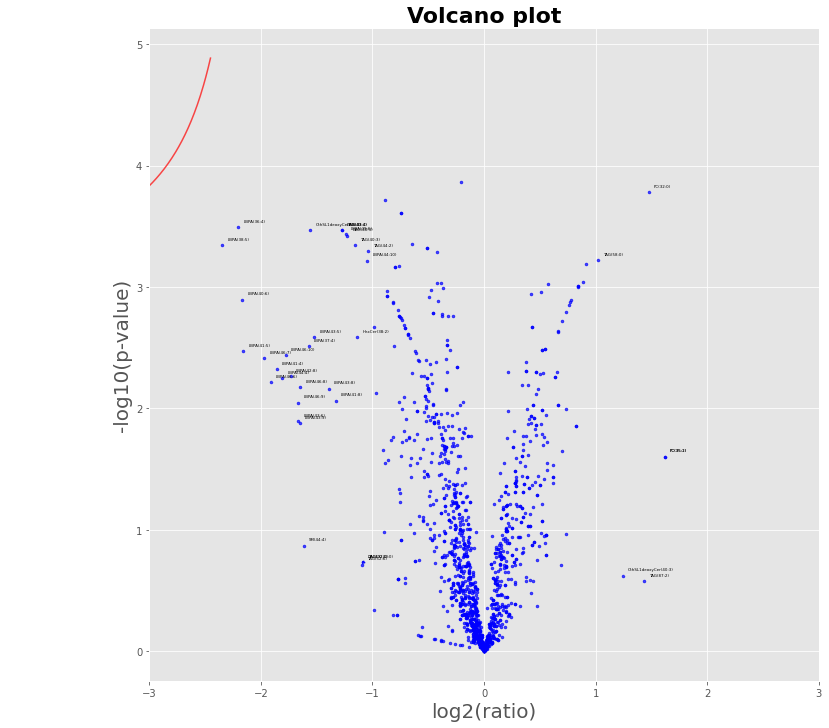

In [30]:
#create the Volcano object

df_pvalue2 = df_pvalue.reset_index()
df_pvalue2 = df_pvalue2.replace(0, np.nan)
df_pvalue2 = df_pvalue2.dropna(how='all', axis=0)

v = Volcano(df_pvalue2["log2_fold_change"], df_pvalue2["minuslog10_pvalue"], df_pvalue2["index"], 
            s_curve_x_axis_overplot=.5, 
            s_curve_y_axis_overplot=.5)

fig = v.get_fig()
plt.xlim([-3, 3])
fig.savefig("pccl3_siCREB3L1_volcano.svg", format='svg', dpi=1200)

In [ ]:
#transform the data to log2

df_t.iloc[:,1:] = df_t.iloc[:,1:].transform(lambda x: np.log2(x.astype('float64')))
df_t

#df_t.to_csv('pccl3_creb3l1caVSpcDNA_log2.csv')

In [ ]:
#calculate z_score

z_scores = df_t.iloc[:,1:].transform(lambda x : zscore(x.astype('float64'),ddof=1))

In [ ]:
#merge z_score with Lipid-Class column to create df_final

df_final_sicreb3l1 = pd.concat([df_t.iloc[:,:1], z_scores], axis = 1)

In [ ]:
df_final_sicreb3l1.dtypes

In [ ]:
#save to csv
df_final_sicreb3l1.to_csv('pccl3_sicreb3l1.csv')

## Clustermap and Heatmap

In [ ]:
#Clustermap 

df2 = df_final_sicreb3l1.copy()
df2 = df2.set_index('Class-Lipid', drop = True)


#Clustermap

ax = sns.clustermap(df2,
                    #z_score = 1,
                    #cmap="vlag",
                    #center=0, 
                    #vmin = -1,
                    #vmax = 1,
                    yticklabels=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

#plt.title('Cluster map', fontsize = 60) # title with fontsize 20
#plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
#plt.ylabel('Z - Score', fontsize =80) # y-axis label with fontsize 15

#ax.savefig("databeforecombat.png")

In [ ]:
#Regular Heatmap

fig, ax = plt.subplots(figsize=(80,10))
ax = sns.heatmap(df2,
                 linewidth = .1,
                 #vmin=-3,
                 #vmax=3,
                 cmap="YlGnBu")
fig.savefig("pccl3_siCREB3L1VSsiscramble.png")

In [ ]:
#Correlation Clustermap

from scipy.spatial import distance
from scipy.cluster import hierarchy

correlations = df2.corr()
correlations_array = np.asarray(df2.corr())

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, method="average", figsize=(100, 100))

In [ ]:
res = sns.clustermap(df2, standard_scale=0, figsize=(100,100), linewidth = .2)
#res.savefig("pccl3_creb3l1CAVSpcDNA_clustermap.png")

In [ ]:
def extract_clustered_table(res, data):
    """
    input
    =====
    res:     <sns.matrix.ClusterGrid>  the clustermap object
    data:    <pd.DataFrame>            input table
    
    output
    ======
    returns: <pd.DataFrame>            reordered input table
    """
    
    # if sns.clustermap is run with row_cluster=False:
    if res.dendrogram_row is None:
        print("Apparently, rows were not clustered.")
        return -1
    
    if res.dendrogram_col is not None:
        # reordering index and columns
        new_cols = data.columns[res.dendrogram_col.reordered_ind]
        new_ind = data.index[res.dendrogram_row.reordered_ind]
        
        return data.loc[new_ind, new_cols]
    
    else:
        # reordering the index
        new_ind = data.index[res.dendrogram_row.reordered_ind]

        return data.loc[new_ind,:]

In [ ]:
ordered = extract_clustered_table(res, df2)

In [ ]:
df2

In [ ]:
sns.pairplot(df3)

In [ ]:
#Merging of the datasets of all the lipids

data_concat = pd.concat([data_cl, data_n1,data_p1,data_p2], axis=1)
data_concat = data_concat.loc[:,~data_concat.columns.duplicated()]

# And the cell number
data_concat = data_concat.merge(data_cn, on='CP0_ID.BR')

In [ ]:
#Elimination of unnecesary columns
data_concat = data_concat.drop(['Unnamed: 0','CP0_ID.BR','BR','CP0_ID','CP_plate','GENE_y','Series', 'Cell area covered by objects (%)'], axis=1)

In [ ]:
#Same process as before but for cell number
data_concat['Cell number'] = data_concat['Cell number'].apply(pd.to_numeric, errors='coerce')
data_concat = data_concat.groupby(['GENE_x','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE_x']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
# Loading / Saving dataset

data_concat.to_csv('rawdata_allkinases.csv')
#data_concat = pd.read_csv('data_concat.csv')
#data_concat = data_concat.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Normalising the data by Cell Number
data_concat.iloc[:,2:756] = data_concat.iloc[:,2:756].div(data_concat['Cell number'], axis=0)
data_concat = data_concat.drop(['Cell number'], axis=1)

In [ ]:
#Outliers removal INSIDE BATCH (z-score > 3)
z_scores = data_concat.groupby(['GENE','Batch']).transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Outliers removal OVERALL (z-score > 3)
z_scores = data_concat.iloc[:,2:755].transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Transform the data to log10 (OPTIONAL)

#data_log = data_concat
#data_log.iloc[:,2:755] = np.log10(data_log.iloc[:,2:755])

In [ ]:
# Taking the mean for each kinase

concat_mean = data_concat.groupby(['GENE_x']).mean().reset_index()
concat_mean = concat_mean.drop(['Batch'], axis=1)

In [ ]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()

concat_mean.iloc[:,2:756] = scaler.fit_transform(concat_mean.iloc[:,2:756].to_numpy())

In [ ]:
#Filtering all the same lipids in one column / grouped by the name of lipids

filter_col_SM = [col for col in batch if col.startswith('SM')]
filter_col_GlcCer = [col for col in batch if col.startswith('Glc')]
filter_col_Cer = [col for col in batch if col.startswith('DHCer')] + [col for col in batch if col.startswith('Cer')]
filter_col_CL = [col for col in batch if col.startswith('CL')]
filter_col_LysoPC = [col for col in batch if col.startswith('LysoPC')]
filter_col_PC = [col for col in batch if col.startswith('PC')]
filter_col_LysoPE = [col for col in batch if col.startswith('LysoPE')]
filter_col_PE = [col for col in batch if col.startswith('PE')]
filter_col_LysoPI = [col for col in batch if col.startswith('LysoPI')]
filter_col_PI = [col for col in batch if col.startswith('PI')]
filter_col_LysoPS = [col for col in batch if col.startswith('LysoPS')]
filter_col_PS = [col for col in batch if col.startswith('PS')]

lipids_sum = filter_col_CL + filter_col_LysoPC + filter_col_PC + filter_col_LysoPE + filter_col_PE + filter_col_SM + filter_col_GlcCer + filter_col_Cer + filter_col_LysoPI + filter_col_PI + filter_col_LysoPS + filter_col_PS

In [ ]:
#Sum up all the all the lipids with the same head-group

batch['CL_Sum'] = batch[filter_col_CL].sum(axis=1)
batch['LysoPC_Sum'] = batch[filter_col_LysoPC].sum(axis=1)
batch['PC_Sum'] = batch[filter_col_PC].sum(axis=1)
batch['LysoPE_Sum'] = batch[filter_col_LysoPE].sum(axis=1)
batch['PE_Sum'] = batch[filter_col_PE].sum(axis=1)
batch['SM_Sum'] = batch[filter_col_SM].sum(axis=1)
batch['GlcCer_Sum'] = batch[filter_col_GlcCer].sum(axis=1)
batch['Cer_Sum'] = batch[filter_col_Cer].sum(axis=1)
batch['LysoPI_Sum'] = batch[filter_col_LysoPI].sum(axis=1)
batch['PI_Sum'] = batch[filter_col_PI].sum(axis=1)
batch['LysoPS_Sum'] = batch[filter_col_LysoPS].sum(axis=1)
batch['PS_Sum'] = batch[filter_col_PS].sum(axis=1)

In [ ]:
# Eliminate non-essential columns and keep only the sumed-up ones

features_sum = ['GENE', 'Batch', 'CL_Sum', 'LysoPC_Sum', 'PC_Sum',
                'LysoPE_Sum', 'PE_Sum', 'SM_Sum', 'GlcCer_Sum', 'Cer_Sum',
                'LysoPI_Sum', 'PI_Sum', 'LysoPS_Sum', 'PS_Sum']
batch_sum = batch[features_sum]

In [ ]:
pd.set_option('display.max_rows', 800)
batch_sum_mean

In [ ]:
#Calculate z-score
from scipy.stats import zscore
zlog_batch = log_batch.apply(zscore)